In [4]:
!ls -l ../output/19*windows*.pkl

-rw-r--r--  1 yoavfreund  staff  270788526 Jun  9 13:51 ../output/19 Days And Counting-JxQKYgw9G2k_windows0.pkl


In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pickle
Windows=pickle.load(open("../output/19 Days And Counting-JxQKYgw9G2k_windows0.pkl","r"))

In [8]:
len(Windows)

376

In [9]:
Windows[0]

[69, 561, 227, 131, 131, array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint64)]

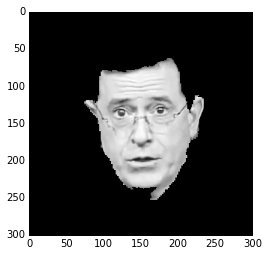

In [50]:
imshow(Windows[316][-1],cmap='Greys_r')

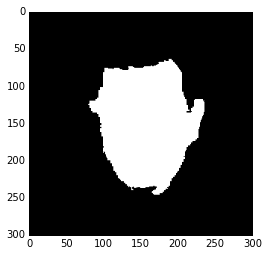

In [53]:
imshow(Windows[83][-1]>0,cmap='Greys_r')

In [66]:
%% writefile faceDist.py
n_pixels=float(len(ravel(Windows[0][-1])))
def dist(w1,w2,jaccard_weight=100):
    mask1=1.*(w1>0)
    mask2=1.*(w2>0)
    intersect=mask1*mask2
    union=(mask1+mask2)>0
    jaccard=1-sum(ravel(intersect))/sum(ravel(union))
    grey_dist=sum((ravel(intersect*w1)-ravel(intersect*w2))**2)/n_pixels
    return jaccard_weight*jaccard+grey_dist

In [67]:
dist(Windows[316][-1],Windows[330][-1])


1255.3926163964641

In [68]:
L=len(Windows)
D=np.zeros([L,L])
for i in range(len(Windows)):
    for j in range(len(Windows)):
        D[i,j]=dist(Windows[i][-1],Windows[j][-1])
    print '\r',i,

375


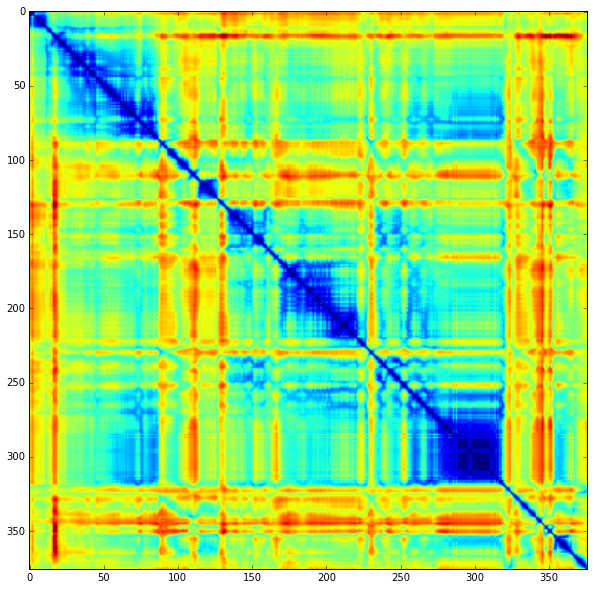

In [65]:
figure(figsize=(10,10))
imshow(D)

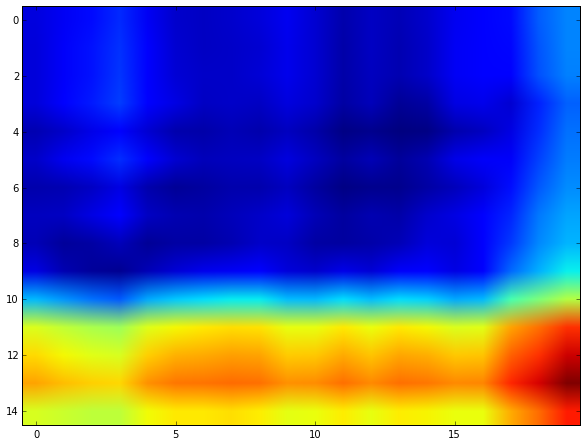

In [49]:
figure(figsize=(10,10))
imshow(D[310:325,70:90])

In [31]:
L=len(Windows)
D=np.zeros([L,L])